In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
# Load the uploaded Excel file
file_path = '12threads.xlsx'
#Columnas a comparar
columnas = ['Abstaylor', 'Simulated-annealing-parallel']


data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':       Problema  Abstaylor  Hill-climbing  Hill-climbing-parallel  \
  0     ex14_2_3       1.77           1.70                    1.47   
  1     ex14_2_7      47.41         102.79                   45.22   
  2      ex2_1_8      19.22          19.83                    9.10   
  3      ex2_1_9      14.17          14.20                    8.77   
  4  ex2_1_9fact       8.66           8.94                    9.25   
  
     Simulated-annealing  Simulated-annealing-joa  Simulated-annealing-parallel  
  0                 2.42                     1.58                          1.37  
  1                66.31                    59.33                         37.83  
  2                32.31                    18.49                          8.31  
  3                 9.67                    14.64                          8.08  
  4                 9.90                     9.58                          7.14  ,
  'Nodos':       Problema  Abstaylor  H

In [212]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['ex14_2_3',
 'ex14_2_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex2_1_9fact',
 'ex6_1_3bis',
 'ex6_1_4',
 'ex6_2_6',
 'ex6_2_8',
 'ex7_3_4',
 'ex7_3_4bis',
 'haverly',
 'launch']

In [213]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Abstaylor  Simulated-annealing-parallel
 0       1.77                          1.37
 1      47.41                         37.83
 2      19.22                          8.31
 3      14.17                          8.08
 4       8.66                          7.14,
 'Nodos':    Abstaylor  Simulated-annealing-parallel
 0      604.8                         584.0
 1    10838.0                       11889.2
 2     1660.4                        1609.2
 3     5158.8                        5180.0
 4     5104.4                        5104.0}

In [214]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing-parallel
 0    0.563694                      0.436306
 1    0.556194                      0.443806
 2    0.698147                      0.301853
 3    0.636854                      0.363146
 4    0.548101                      0.451899
 5    0.548533                      0.451467
 6    0.551020                      0.448980
 7    0.511047                      0.488953
 8    0.512658                      0.487342
 9    0.647332                      0.352668
 10   0.584239                      0.415761
 11   0.594595                      0.405405
 12   0.821119                      0.178881,
 'Nodos':     Abstaylor  Simulated-annealing-parallel
 0    0.508748                      0.491252
 1    0.476874                      0.523126
 2    0.507830                      0.492170
 3    0.498975                      0.501025
 4    0.500020                      0.499980
 5    0.500081                      0.499919
 6    0.516937                    

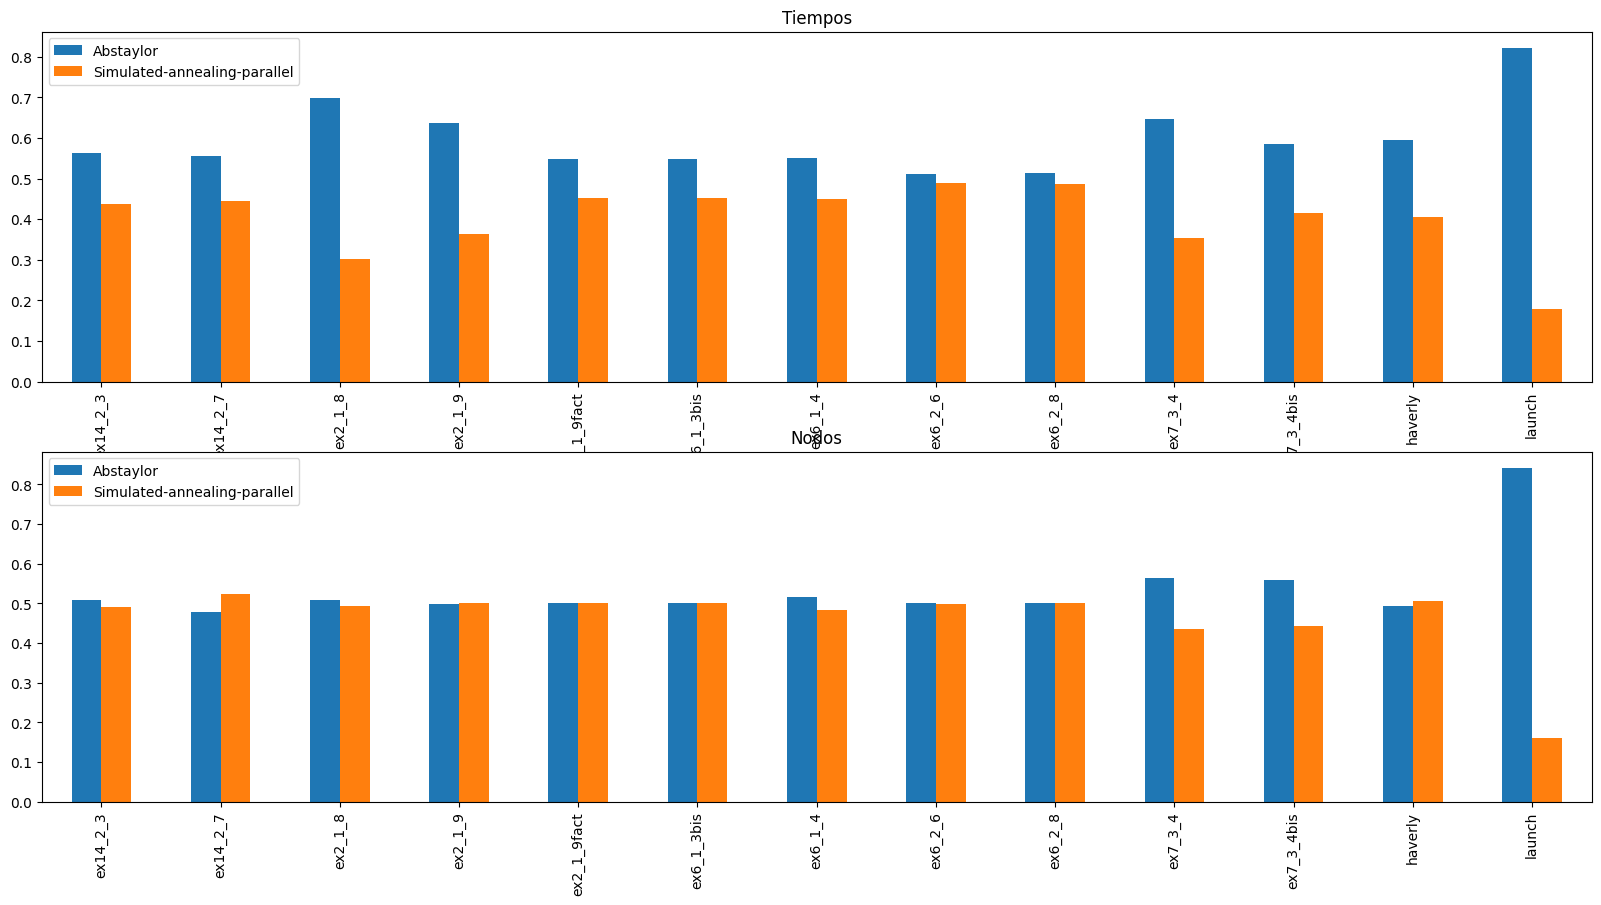

In [215]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()


In [216]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing-parallel  Diferencia
 0    0.563694                      0.436306  -12.738854
 1    0.556194                      0.443806  -11.238855
 2    0.698147                      0.301853  -39.629495
 3    0.636854                      0.363146  -27.370787
 4    0.548101                      0.451899   -9.620253
 5    0.548533                      0.451467   -9.706546
 6    0.551020                      0.448980  -10.204082
 7    0.511047                      0.488953   -2.209449
 8    0.512658                      0.487342   -2.531646
 9    0.647332                      0.352668  -29.466357
 10   0.584239                      0.415761  -16.847826
 11   0.594595                      0.405405  -18.918919
 12   0.821119                      0.178881  -64.223798,
 'Nodos':     Abstaylor  Simulated-annealing-parallel  Diferencia
 0    0.508748                      0.491252   -1.749664
 1    0.476874                      0.523126    4.625295
 2    0.50

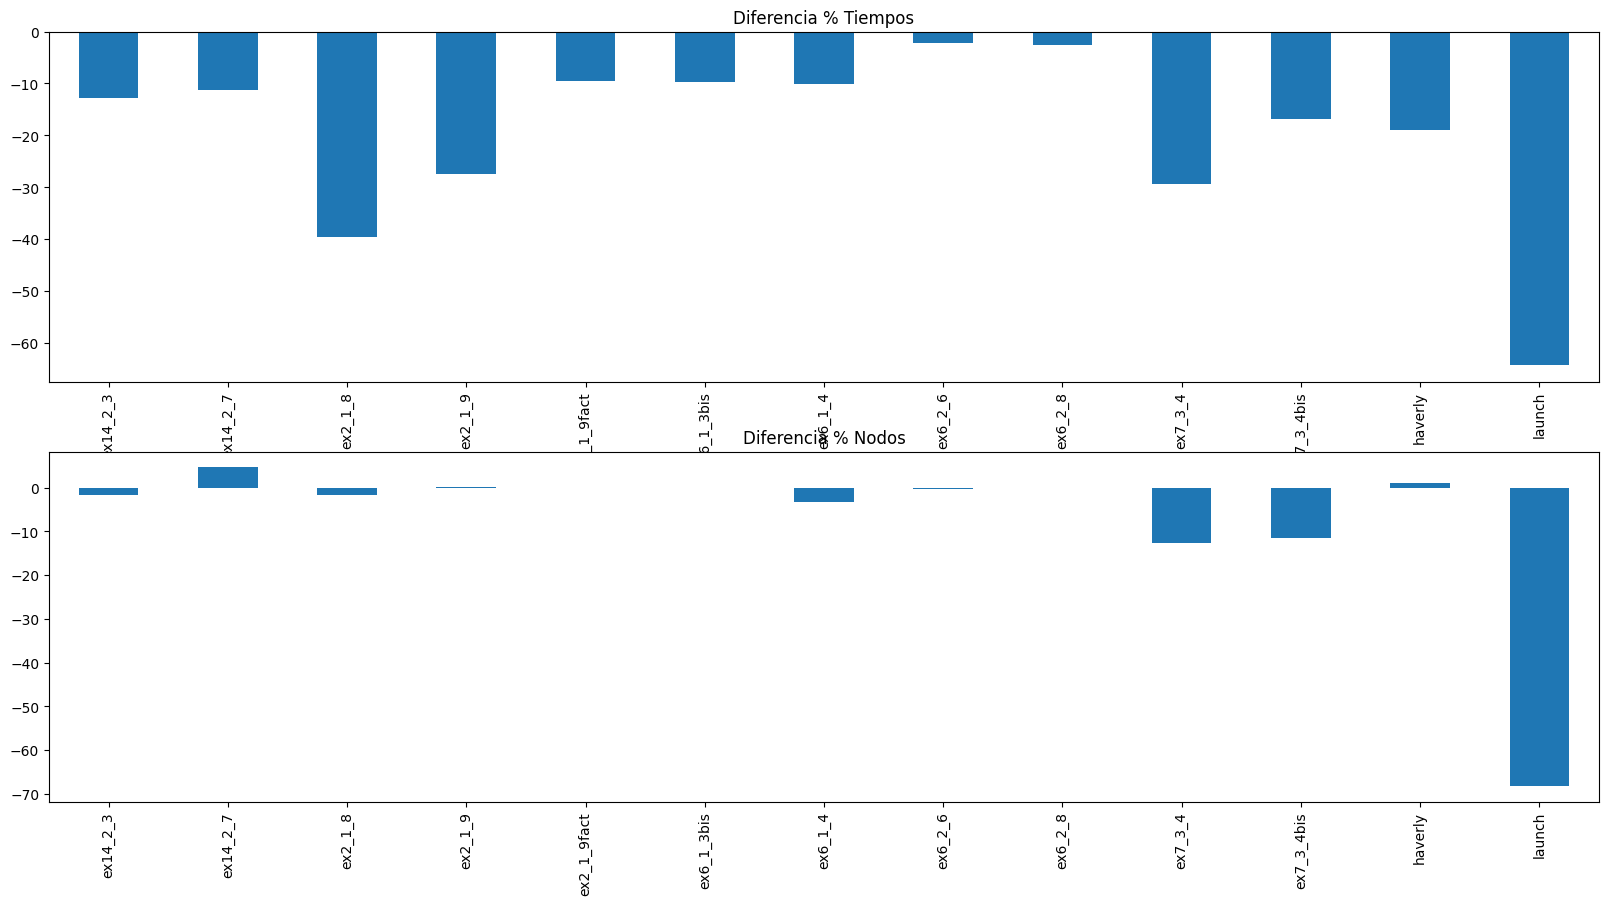

In [217]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [218]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': -19.5928358363849, 'Nodos': -7.177107744346115}

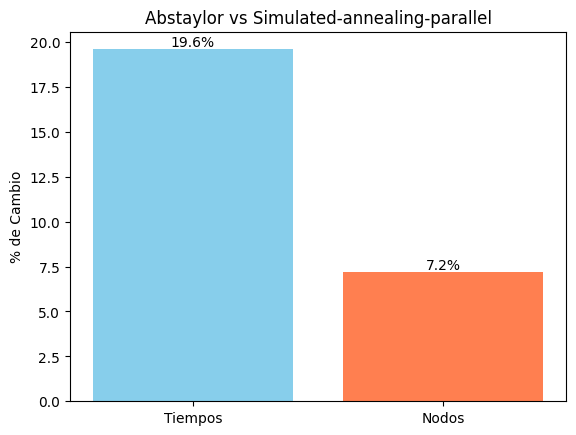

In [219]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [220]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing-parallel  Diferencia  Speed Up
 0    0.563694                      0.436306  -12.738854  1.291971
 1    0.556194                      0.443806  -11.238855  1.253238
 2    0.698147                      0.301853  -39.629495  2.312876
 3    0.636854                      0.363146  -27.370787  1.753713
 4    0.548101                      0.451899   -9.620253  1.212885
 5    0.548533                      0.451467   -9.706546  1.215000
 6    0.551020                      0.448980  -10.204082  1.227273
 7    0.511047                      0.488953   -2.209449  1.045187
 8    0.512658                      0.487342   -2.531646  1.051948
 9    0.647332                      0.352668  -29.466357  1.835526
 10   0.584239                      0.415761  -16.847826  1.405229
 11   0.594595                      0.405405  -18.918919  1.466667
 12   0.821119                      0.178881  -64.223798  4.590308,
 'Nodos':     Abstaylor  Simulated-annealing-paral

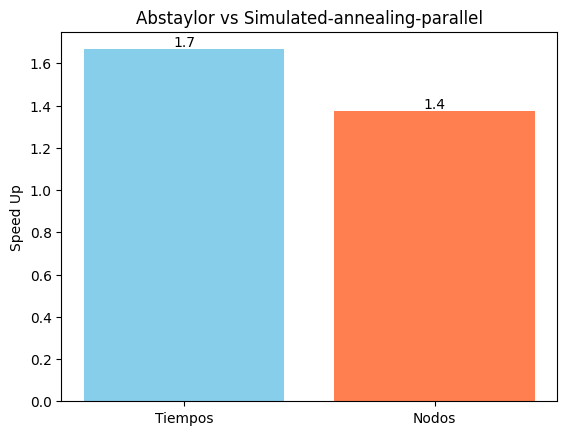

In [221]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()